In [124]:
import pandas as pd
import numpy as np
import sklearn 

In [125]:
data = pd.read_csv('spam.csv', encoding="ISO-8859-1")


In [126]:
data.sample(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3828,ham,"Sure, I'll see if I can come by in a bit",NaN,NaN,NaN
3229,ham,I feel like a dick because I keep sleeping thr...,NaN,NaN,NaN
2552,ham,"Oh fine, I'll be by tonight",NaN,NaN,NaN
35,ham,Yup... Ok i go home look at the timings then i...,NaN,NaN,NaN
4983,spam,goldviking (29/M) is inviting you to be his fr...,NaN,NaN,NaN
2591,ham,Still work going on:)it is very small house.,NaN,NaN,NaN
2946,ham,Leave it. U will always be ignorant.,NaN,NaN,NaN
5478,ham,No probably &lt;#&gt; %.,NaN,NaN,NaN


In [127]:
data.shape

(5572, 5)

### Steps:
    
    1.Data Cleaning
    
    2.EDA(Exploratory Data Analysis)
    
    3.Text Preprocessing
    
    4.Model Building
    
    5.Model Evaluation
    
    6.Imrovments
    
    7.Converting into Website
    
    8.Deployment on Heroku

# 1. Data Cleaning

In [128]:
# Dropping unnessesary data:

data.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
# Renaming Columns:

data.rename(columns= {'v1': 'Target', 'v2': 'Text'}, inplace= True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [130]:
# Missing Values

data.isnull().sum()

Target    0
Text      0
dtype: int64

In [131]:
# Checking Duplicate Values

data.duplicated().sum()

403

In [132]:
# Removing Duplicate Values

data = data.drop_duplicates(keep='first')

In [133]:
data.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [134]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
data['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

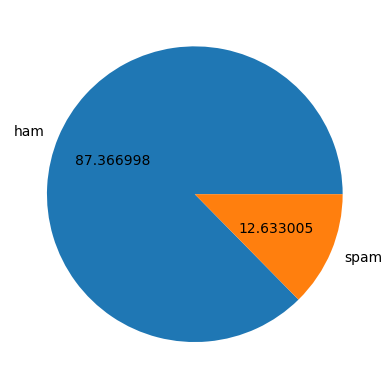

In [136]:
# Presentation

import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels=['ham', 'spam'], autopct = "%0.6f")
plt.show()

Data is "Imbalanced"

In [137]:
import nltk

In [138]:
!pip install nltk

In [139]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
data['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [141]:
# Fetching number of characters

data['no_characters'] = data['Text'].apply(len)

In [142]:
data.head()

,Target,Text,no_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [143]:
# Fetching number of words

data['no_words'] = data['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [144]:
data.head()

,Target,Text,no_characters,no_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [145]:
# Fetching number of sentences

data['no_sentences'] = data['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [146]:
data[['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [147]:
data['Target'] = data['Target'].map({'spam': 1, 'ham': 0})

In [148]:
# For ham

data[data['Target'] == 0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [149]:
# For spam

data[data['Target'] == 1][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

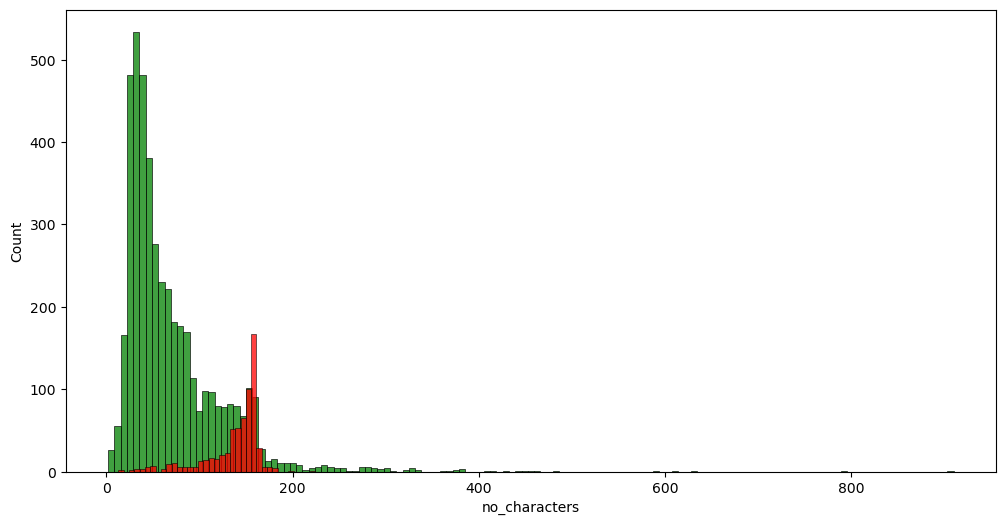

In [150]:
# Visualization for number of characters in ham and spam messages.

plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['no_characters'], color = 'green')   # Ham
sns.histplot(data[data['Target'] == 1]['no_characters'], color = 'red')   # Spam

<AxesSubplot:xlabel='no_words', ylabel='Count'>

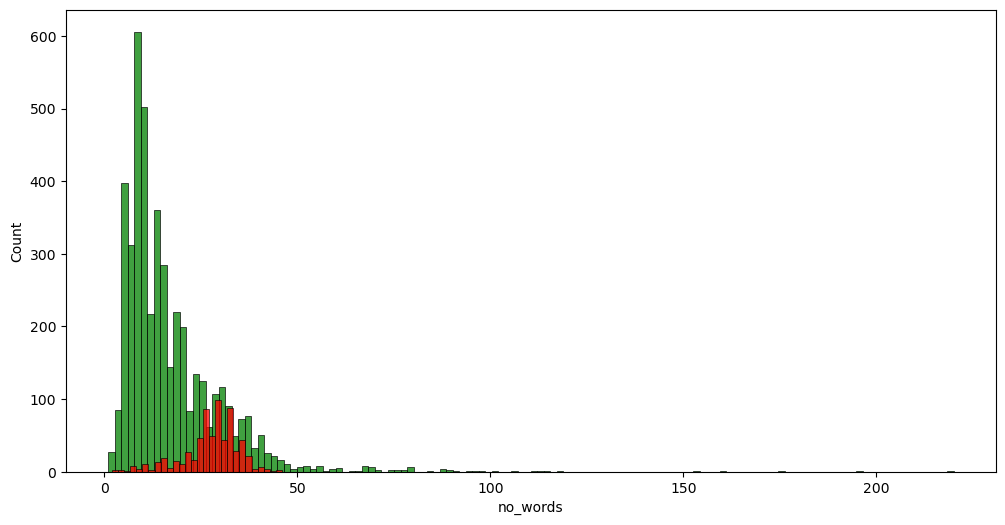

In [151]:
# Visualization for number of words in ham and spam messages.

plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['no_words'], color = 'green')   # Ham
sns.histplot(data[data['Target'] == 1]['no_words'], color = 'red')   # Spam

<AxesSubplot:xlabel='no_sentences', ylabel='Count'>

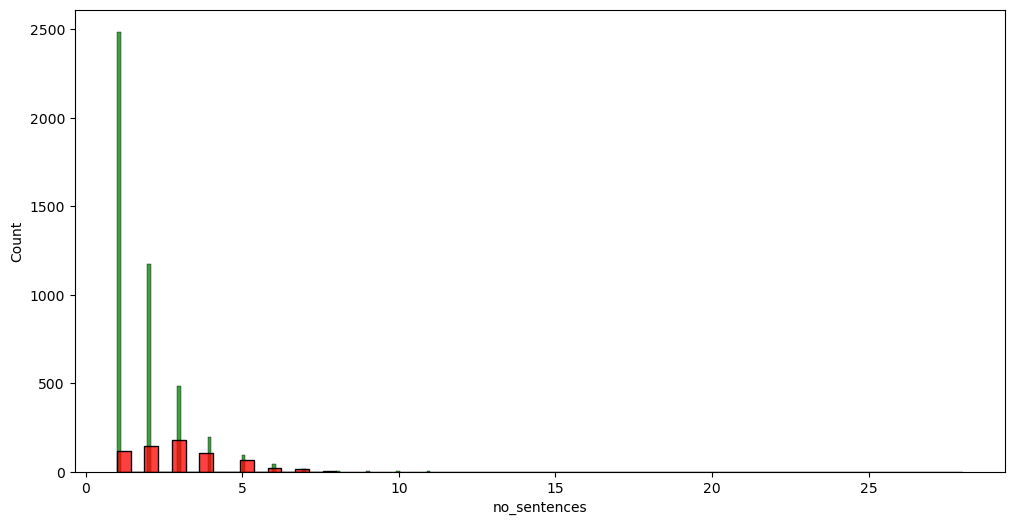

In [152]:
# Visualization for number of sentences in ham and spam messages.

plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['no_sentences'], color = 'green')   # Ham
sns.histplot(data[data['Target'] == 1]['no_sentences'], color = 'red')   # Spam

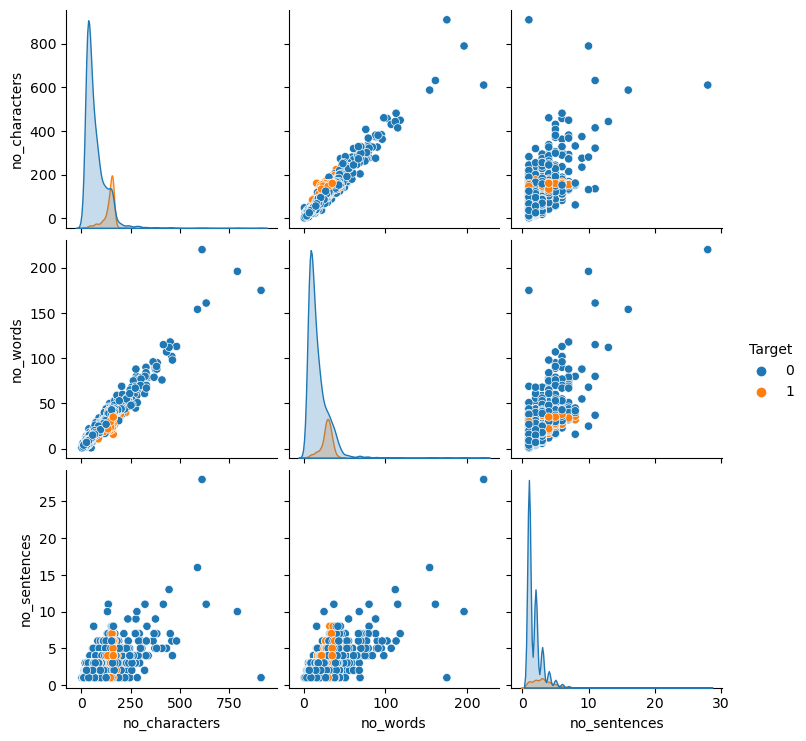

In [153]:
# Plotting relationship between number of words, sentences and characters

import seaborn as sns

sns.pairplot(data, hue = 'Target')

<AxesSubplot:>

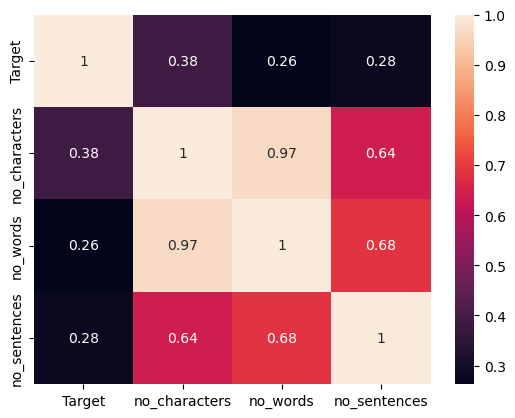

In [154]:
sns.heatmap(data.corr(), annot=True)

# 3. Data Preprocessing

Lower Case

Tokenization

Removing special characters

Removing stop words and punctuations

Steamming

In [155]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
from nltk.corpus import stopwords
import string

# Your code that uses stopwords
stop_words = set(stopwords.words('english'))

In [157]:
def transform_text(Text):
    Text = Text.lower()            # Making text lowercase
    Text = nltk.word_tokenize(Text) # 
    
    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    
    for i in Text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i)) 
        
        
    return " ".join(y)

In [158]:
transform_text('Did you like my presentation on ML')

'like present ml'

In [159]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [160]:
transform_text('I loved the YT lectures on Machine Learning')

'love yt lectur machin learn'

In [161]:
data['transformed_text'] = data['Text'].apply(transform_text)

In [162]:
data.head()

,Target,Text,no_characters,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

We are starting with naive based algorithm as it considered
the best fit algorithm for textbased ML problem.

In [163]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [164]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [165]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [166]:
x.shape

(5169, 3000)

In [167]:
y = data['Target'].values

In [168]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

In [171]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [172]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [173]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [174]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [175]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [176]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb')) 
pickle.dump(mnb,open('model.pkl', 'wb'))